In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [10]:
df = pd.read_csv('E:/DATA ANALYTICS/IMARTICUS/PGA06/civil/compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [71]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':"cement",
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':"furnace_slag",
       'Fly Ash (component 3)(kg in a m^3 mixture)':"fly_ash",
       'Water  (component 4)(kg in a m^3 mixture)':"water",
       'Superplasticizer (component 5)(kg in a m^3 mixture)':"super_plasticizer",
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':"coarse_agg",
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':"fine_agg", 'Age (day)':"age",
       'Concrete compressive strength(MPa, megapascals) ':"compressive_strength"})

In [72]:
df.head()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [63]:
df.tail()

,cement,furnace_slag,fly_ash,water,super_plasticizer,coarse_agg,fine_agg,age,compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                  1030 non-null float64
furnace_slag            1030 non-null float64
fly_ash                 1030 non-null float64
water                   1030 non-null float64
super_plasticizer       1030 non-null float64
coarse_agg              1030 non-null float64
fine_agg                1030 non-null float64
age                     1030 non-null int64
compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
print (df.isnull().sum())

cement                  0
furnace_slag            0
fly_ash                 0
water                   0
super_plasticizer       0
coarse_agg              0
fine_agg                0
age                     0
compressive_strength    0
dtype: int64


In [14]:
print("Number of rows    :",df.shape[0])
print("Number of columns :",df.shape[1])

Number of rows    : 1030
Number of columns : 9


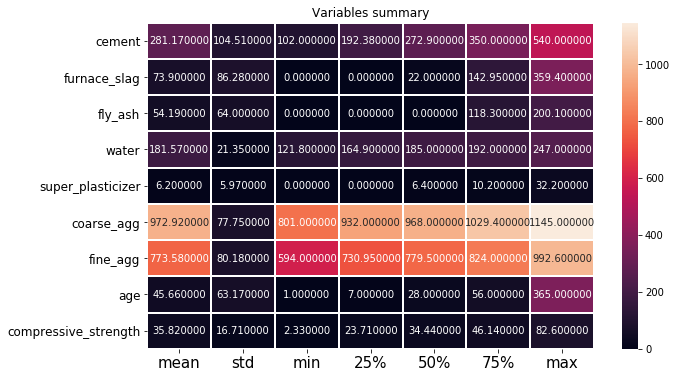

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt="f")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

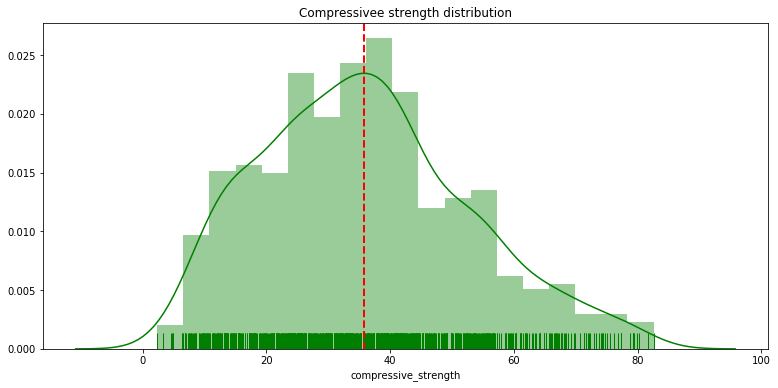

In [58]:
plt.figure(figsize=(13,6))
sns.distplot(df["compressive_strength"],color="g",rug=True)
plt.axvline(df["compressive_strength"].mean(),
            linestyle="dashed",color="r",
            label='mean',linewidth=2)
plt.title("Compressivee strength distribution")
plt.show()

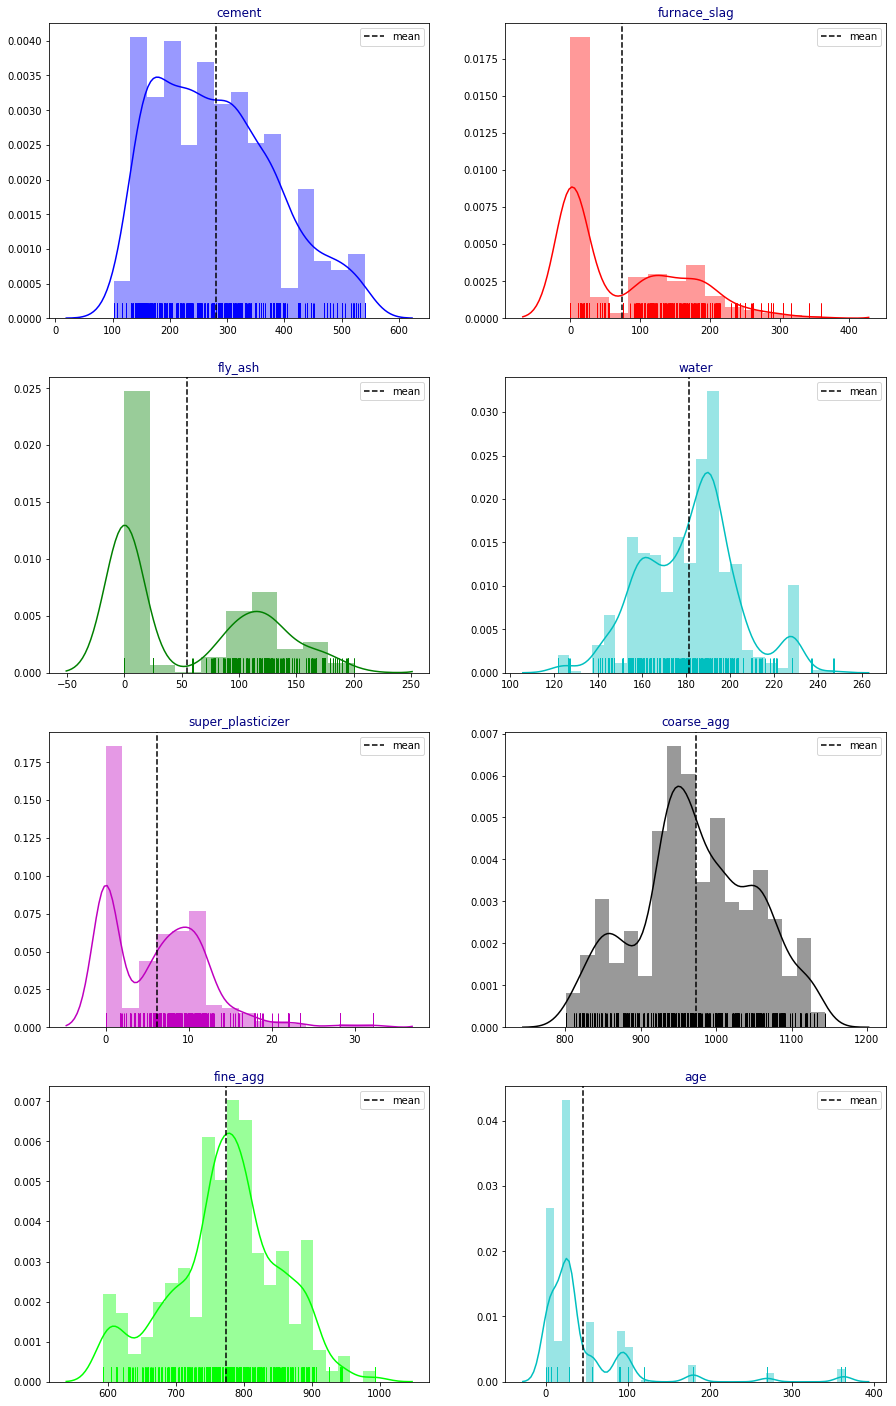

In [73]:
cols = [i for i in data.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(15,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

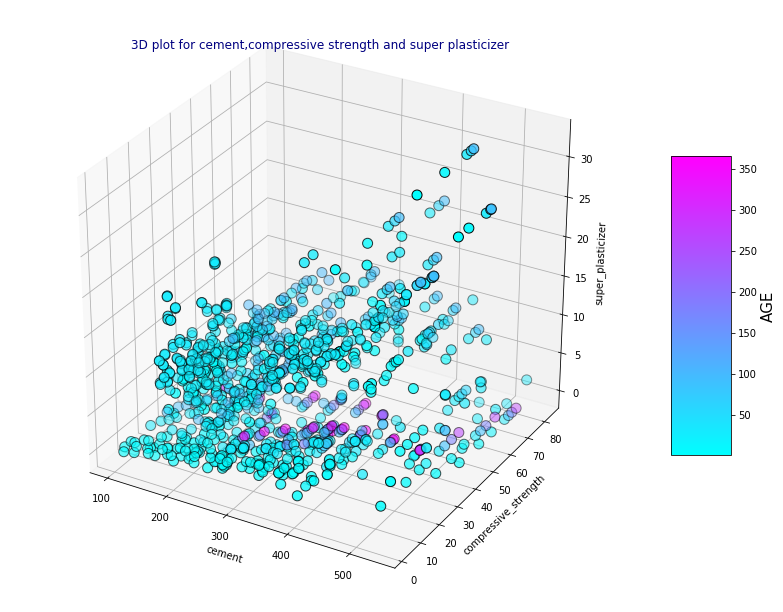

In [77]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(data["cement"],
           data["compressive_strength"],
           data["super_plasticizer"],
           linewidth=1,edgecolor ="k",
           c=data["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("compressive_strength")
ax.set_zlabel("super_plasticizer")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,compressive strength and super plasticizer",color="navy")
plt.show()

In [78]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(data,test_size =.3,random_state = 123)
train_X = train[[x for x in train.columns if x not in ["compressive_strength"] + ["age_months"]]]
train_Y = train["compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["compressive_strength"] + ["age_months"]]]
test_Y  = test["compressive_strength"]

In [82]:
from sklearn import datasets, linear_model, metrics 
reg = linear_model.LinearRegression()

In [102]:

from sklearn.metrics import mean_squared_error

target = "compressive_strength"
def model(algorithm,dtrainx,dtrainy,dtestx,dtesty,of_type):
    
    print (algorithm)
    algorithm.fit(dtrainx,dtrainy)
    prediction = algorithm.predict(dtestx)
    print ("ROOT MEAN SQUARED ERROR :", np.sqrt(mean_squared_error(dtesty,prediction)) )
    prediction = pd.DataFrame(prediction)
    print(prediction)

In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,train_X,train_Y,test_X,test_Y,"coef")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
ROOT MEAN SQUARED ERROR : 10.259026562177118
             0
0    53.979283
1    25.587737
2    26.639279
3    25.552442
4    34.857015
5    53.494621
6    43.040584
7    47.708150
8    27.225514
9    19.291622
10   48.867486
11   31.061593
12   54.173698
13   15.231846
14   48.099711
15   29.786296
16   44.856099
17   31.251135
18   27.234692
19   36.199308
20   34.904861
21   18.606318
22   52.164784
23   52.850227
24   28.547870
25   26.480679
26   75.510959
27   27.310981
28   40.082684
29   31.262265
..         ...
279  28.819437
280  39.983891
281  41.383972
282  24.109268
283  35.871655
284  30.888582
285  44.204635
286  24.364653
287  28.864225
288  43.622314
289  33.805162
290  31.611571
291  12.334472
292  50.874624
293  22.662659
294  24.188170
295  13.275819
296  15.124133
297  50.077821
298  26.038286
299  46.292633
300  46.025800
301  22.312388
302  51.292249
303  31.523749
304  19.762